In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
from collections import defaultdict
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

📘 Theme Rules

In [28]:
nlp = spacy.load("en_core_web_sm")

THEME_RULES = {
    'Account Access Issues': ['login', 'password', 'authentication', 'sign', 'session'],
    'Transaction Performance': ['transfer', 'slow', 'fail', 'timeout', 'crash', 'delay'],
    'User Interface & Experience': ['interface', 'ui', 'ux', 'navigation', 'layout', 'design'],
    'Customer Support': ['support', 'help', 'assist', 'response', 'service'],
    'Feature Requests': ['feature', 'add', 'include', 'missing', 'option', 'functionality']
}


📘 TF-IDF Keyword Extractor

In [3]:
def extract_tfidf_keywords(reviews, max_features=30, ngram_range=(1, 2)):
    vectorizer = TfidfVectorizer(stop_words='english', max_features=max_features, ngram_range=ngram_range)
    X = vectorizer.fit_transform(reviews)
    return list(vectorizer.get_feature_names_out())


📘 Cell 4: Theme Assignment Function

In [4]:
def assign_themes(text, theme_rules):
    text_lower = text.lower()
    matched = []
    for theme, keywords in theme_rules.items():
        if any(keyword in text_lower for keyword in keywords):
            matched.append(theme)
    return ', '.join(matched) if matched else 'Other'


📘 Cell 5: Theme Tagger Wrapper

In [5]:
def apply_theme_analysis(df, theme_rules):
    df['identified_themes'] = df['review'].apply(lambda x: assign_themes(str(x), theme_rules))
    return df


In [6]:
df = pd.read_csv('../data/sentiment_reviews.csv')
df = df.dropna(subset=['review'])
df = apply_theme_analysis(df, THEME_RULES)
df.to_csv('../data/thematic_reviews.csv', index=False)
df.head()


,review,rating,date,bank,source,language,sentiment,identified_themes
0,love,3,2025-06-06,Dashen Bank,Google Play,en,1,Other
1,መቸሸጠ,5,2025-06-03,Dashen Bank,Google Play,en,0,Other
2,wow,5,2025-06-03,Dashen Bank,Google Play,en,1,Other
3,gadaa,5,2025-06-01,Dashen Bank,Google Play,en,0,Other
4,Massive upgrade from the Amole app.,5,2025-05-31,Dashen Bank,Google Play,en,0,Other


📘 TF-IDF Top Keywords by Bank

In [7]:
banks = df['bank'].unique()
for bank in banks:
    bank_reviews = df[df['bank'] == bank]['review'].dropna().tolist()
    keywords = extract_tfidf_keywords(bank_reviews)
    print(f"Top keywords for {bank}:")
    print(', '.join(keywords))


Top keywords for Dashen Bank:
ahead, amazing, app, application, bank, bank super, banking, best, dashen, dashen bank, dashen super, digital, easy, easy use, experience, fast, features, friendly, good, like, mobile, nice, secure, step, super, super app, transactions, use, user, user friendly
Top keywords for Bank of Abyssinia:
app, application, bank, banking, banking app, best, better, boa, crashes, developer, doesn, doesn work, don, fix, good, like, make, mobile, mobile banking, money, nice, options, service, slow, time, times, use, work, working, worst
Top keywords for Commercial Bank of Ethiopia:
account, app, application, apps, bank, banking, best, best app, cbe, developer, easy, easy use, excellent, fast, good, good app, great, like, make, mobile, mobile banking, need, nice, ok, screenshot, update, use, work, በጣም, ነው


📘 Theme Distribution Overall

In [8]:
df['identified_themes'].value_counts()


identified_themes
Other                                                                                                              2431
Transaction Performance                                                                                             132
Feature Requests                                                                                                    132
Customer Support                                                                                                     84
User Interface & Experience                                                                                          34
Transaction Performance, Feature Requests                                                                            26
User Interface & Experience, Feature Requests                                                                        16
Account Access Issues, User Interface & Experience                                                                   16
Account Access Issues 

📘Theme Distribution by Bank

In [9]:
df.groupby('bank')['identified_themes'].value_counts()


bank                         identified_themes                                                                                              
Bank of Abyssinia            Other                                                                                                              816
                             Transaction Performance                                                                                             58
                             Customer Support                                                                                                    36
                             Feature Requests                                                                                                    36
                             Account Access Issues                                                                                               12
                             User Interface & Experience                                                               

Text Cleaning + TF Vectorizer

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize the reviews
vectorizer = CountVectorizer(max_df=0.95, min_df=5, stop_words='english')
X = vectorizer.fit_transform(df['review'].dropna())

# LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)


,n_components,5
,doc_topic_prior,None
,topic_word_prior,None
,learning_method,'batch'
,learning_decay,0.7
,learning_offset,10.0
,max_iter,10
,batch_size,128
,evaluate_every,-1
,total_samples,1000000.0
,perp_tol,0.1


In [11]:
def display_topics(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"🔹 Topic {topic_idx + 1}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

display_topics(lda, vectorizer.get_feature_names_out(), 10)


🔹 Topic 1:
app, nice, banking, fast, user, ነው, excellent, great, super, dashen
🔹 Topic 2:
good, app, work, doesn, bank, working, developer, slow, service, application
🔹 Topic 3:
app, like, wow, ok, don, update, boa, screenshot, apps, work
🔹 Topic 4:
app, bank, dashen, use, amazing, super, easy, application, step, ahead
🔹 Topic 5:
app, best, banking, mobile, money, worst, account, seen, developer, application


📘 Bar Plot: Theme Counts Per Bank

In [29]:
def normalize_bank_names(df):
    df['bank'] = df['bank'].str.strip().str.upper()
    return df


In [30]:
df = normalize_bank_names(df)


In [33]:
# Normalize bank names early
df = normalize_bank_names(df)

# Now apply themes
df = apply_theme_analysis(df, THEME_RULES)
df.to_csv('../data/thematic_reviews.csv', index=False)
df.head()

,review,rating,date,bank,source,language,sentiment,identified_themes,dominant_topic
0,love,3,2025-06-06,DASHEN BANK,Google Play,en,1,Other,Topic_1
1,መቸሸጠ,5,2025-06-03,DASHEN BANK,Google Play,en,0,Other,Topic_1
2,wow,5,2025-06-03,DASHEN BANK,Google Play,en,1,Other,Topic_3
3,gadaa,5,2025-06-01,DASHEN BANK,Google Play,en,0,Other,Topic_1
4,Massive upgrade from the Amole app.,5,2025-05-31,DASHEN BANK,Google Play,en,0,Other,Topic_4


In [35]:
df['bank'] = df['bank'].str.strip().str.upper()


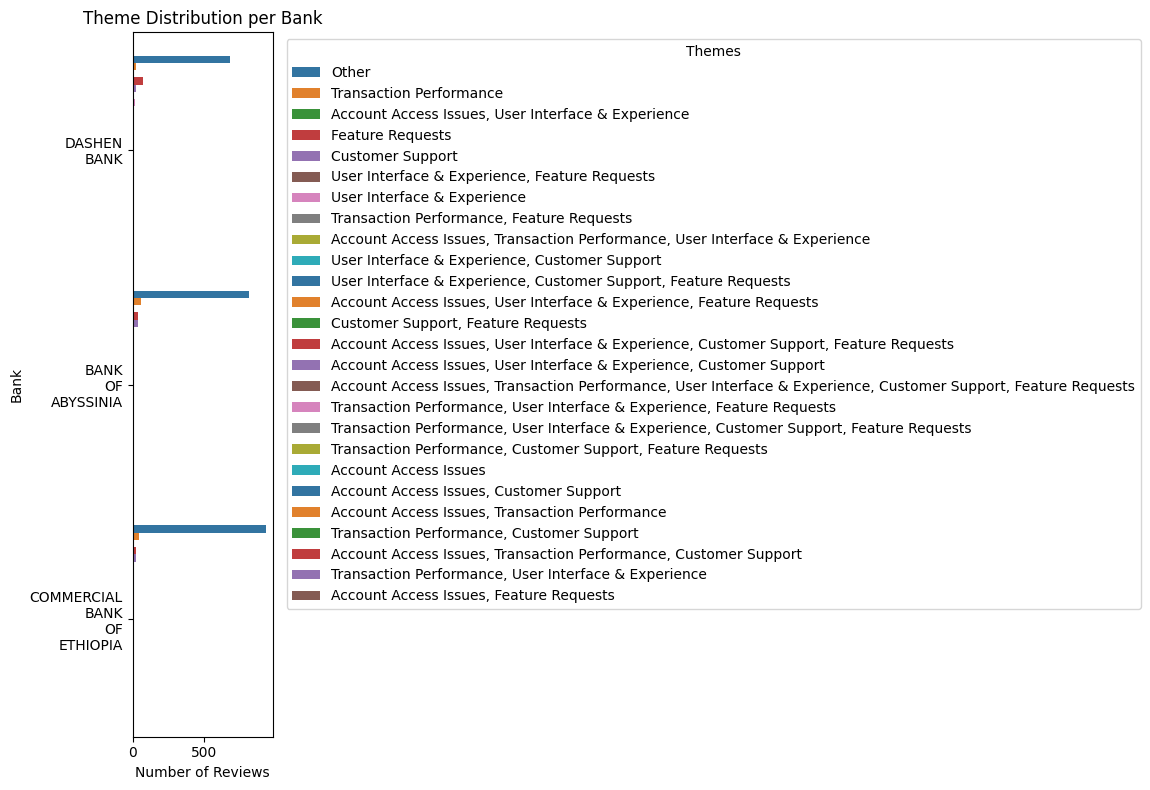

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Normalize bank names
df['bank'] = df['bank'].str.strip().str.upper()

# Increase figure height for more space
plt.figure(figsize=(12, 8))

# Horizontal bar chart: use 'y' instead of 'x'
sns.countplot(data=df, y='bank', hue='identified_themes', palette='tab10')

plt.title("Theme Distribution per Bank")
plt.xlabel("Number of Reviews")
plt.ylabel("Bank")
plt.legend(title="Themes", bbox_to_anchor=(1.05, 1), loc='upper left')

# Improve spacing
plt.tight_layout()
plt.show()


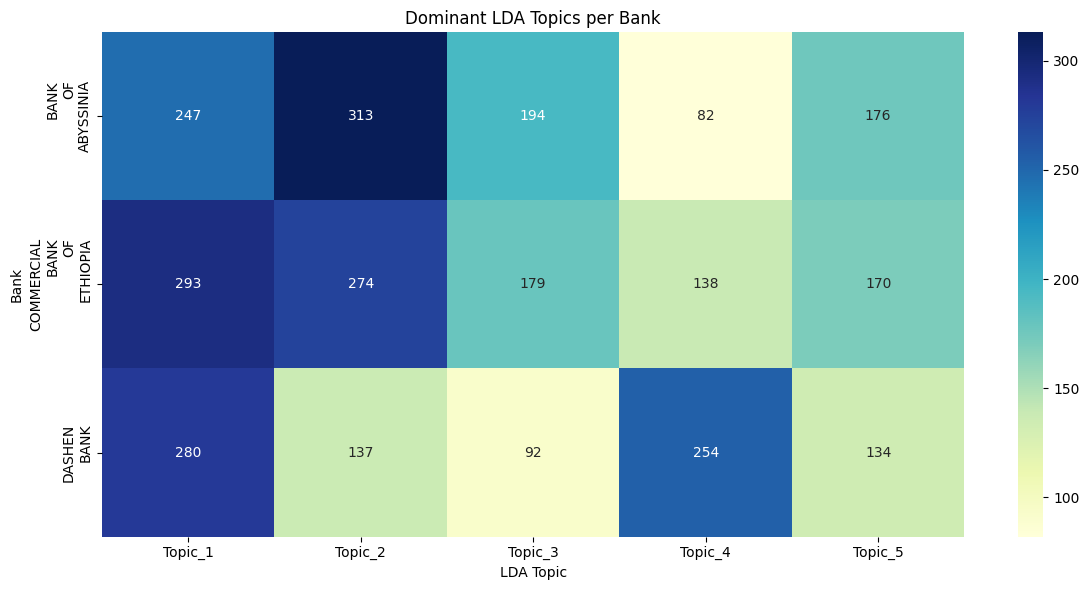

In [42]:
bank_themes = df.groupby("bank")["dominant_topic"].value_counts().unstack().fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(bank_themes, annot=True, cmap="YlGnBu", fmt=".0f")
plt.title("Dominant LDA Topics per Bank")
plt.ylabel("Bank")
plt.xlabel("LDA Topic")
plt.tight_layout()
plt.show()


In [49]:
vectorizer = CountVectorizer(stop_words='english', max_df=0.95, min_df=5)
X = vectorizer.fit_transform(df["review"])
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

def display_topics(model, feature_names, n_top_words=10):
    for idx, topic in enumerate(model.components_):
        print(f"🔹 Topic {idx + 1}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

display_topics(lda, vectorizer.get_feature_names_out())


🔹 Topic 1:
app, nice, banking, fast, user, ነው, excellent, great, super, dashen
🔹 Topic 2:
good, app, work, doesn, bank, working, developer, slow, service, application
🔹 Topic 3:
app, like, wow, ok, don, update, boa, screenshot, apps, work
🔹 Topic 4:
app, bank, dashen, use, amazing, super, easy, application, step, ahead
🔹 Topic 5:
app, best, banking, mobile, money, worst, account, seen, developer, application


In [51]:
def extract_tfidf_keywords(texts, max_features=30, ngram_range=(1, 2)):
    vectorizer = TfidfVectorizer(stop_words='english', max_features=max_features, ngram_range=ngram_range)
    tfidf_matrix = vectorizer.fit_transform(texts)
    return vectorizer.get_feature_names_out()

keywords = extract_tfidf_keywords(df["review"].tolist())
print("Top Keywords:", ", ".join(keywords))


Top Keywords: amazing, app, application, bank, banking, best, best app, cbe, dashen, dashen bank, developer, easy, experience, fast, features, good, great, like, make, mobile, mobile banking, money, nice, super, super app, time, use, user, work, working


In [1]:
from IPython.display import Markdown, display

report = """
# Thematic Analysis Report

## Overview
This notebook performs a thematic analysis of customer sentiment reviews for various banks. The workflow includes text preprocessing, theme assignment using rule-based matching, keyword extraction using TF-IDF, topic modeling with LDA, and visualization of theme distributions.

---

## Steps Performed

### 1. **Data Loading & Preparation**
- Loaded sentiment review data from `../data/sentiment_reviews.csv`.
- Removed rows with missing reviews.
- Normalized bank names for consistency.

### 2. **Theme Rule Definition**
- Defined a set of theme rules (`THEME_RULES`) mapping themes to relevant keywords (e.g., "Account Access Issues", "Transaction Performance", etc.).

### 3. **Theme Assignment**
- Implemented `assign_themes()` to assign one or more themes to each review based on keyword presence.
- Applied this function to the dataset, creating a new column `identified_themes`.

### 4. **TF-IDF Keyword Extraction**
- Used `TfidfVectorizer` to extract top keywords from reviews overall and per bank.
- Displayed the most significant keywords for each bank.

### 5. **Topic Modeling (LDA)**
- Vectorized reviews using `CountVectorizer`.
- Trained a Latent Dirichlet Allocation (LDA) model to identify latent topics.
- Displayed top words for each topic.

### 6. **Visualization**
- Plotted the distribution of identified themes overall and per bank using bar plots.
- Created a heatmap to show the distribution of dominant LDA topics per bank.

---

## Outputs
- Thematic review data saved to `../data/thematic_reviews.csv`.
- Visualizations for theme and topic distributions.
- Lists of top keywords and topics for further analysis.

---

## Conclusion
This workflow enables automated thematic tagging and topic discovery in customer reviews, supporting deeper insights into customer sentiment and areas for improvement for each bank.
"""

display(Markdown(report))


# Thematic Analysis Report

## Overview
This notebook performs a thematic analysis of customer sentiment reviews for various banks. The workflow includes text preprocessing, theme assignment using rule-based matching, keyword extraction using TF-IDF, topic modeling with LDA, and visualization of theme distributions.

---

## Steps Performed

### 1. **Data Loading & Preparation**
- Loaded sentiment review data from `../data/sentiment_reviews.csv`.
- Removed rows with missing reviews.
- Normalized bank names for consistency.

### 2. **Theme Rule Definition**
- Defined a set of theme rules (`THEME_RULES`) mapping themes to relevant keywords (e.g., "Account Access Issues", "Transaction Performance", etc.).

### 3. **Theme Assignment**
- Implemented `assign_themes()` to assign one or more themes to each review based on keyword presence.
- Applied this function to the dataset, creating a new column `identified_themes`.

### 4. **TF-IDF Keyword Extraction**
- Used `TfidfVectorizer` to extract top keywords from reviews overall and per bank.
- Displayed the most significant keywords for each bank.

### 5. **Topic Modeling (LDA)**
- Vectorized reviews using `CountVectorizer`.
- Trained a Latent Dirichlet Allocation (LDA) model to identify latent topics.
- Displayed top words for each topic.

### 6. **Visualization**
- Plotted the distribution of identified themes overall and per bank using bar plots.
- Created a heatmap to show the distribution of dominant LDA topics per bank.

---

## Outputs
- Thematic review data saved to `../data/thematic_reviews.csv`.
- Visualizations for theme and topic distributions.
- Lists of top keywords and topics for further analysis.

---

## Conclusion
This workflow enables automated thematic tagging and topic discovery in customer reviews, supporting deeper insights into customer sentiment and areas for improvement for each bank.
